# IST 707
Name: Lu Guo

## Section 1: Introduction

The classification problem is to classify digital numbers from 0 to 9 from handwritten pictures. Each row represents a handwritten picture, and each picture contains one number.

In [30]:
import pandas as pd
df_train = pd.read_csv('digit-train.csv')
df_test = pd.read_csv('digit-test.csv')

In [31]:
print(len(df_train)) # show the number of rows in the training set
print(len(df_test)) # show the number of rows in the test set

4198
4198


In [32]:
df_train.head() # show the first 5 rows of the training set

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that every row has 785 columns, the first column called label is the target variable, and the rest 784 columns are the features. The features are the pixel values of the images, and the target variable is the digit that the image represents. If the values of the features are 0, it means the pixel is white, and if the values are 255, it means the pixel is black. The values in between are gray.

In [46]:
# print the pixel number that is not 0 in the first row of the training set
for i in range(784):
    if df_train.iloc[0,i] != 0:
        print(df_train.iloc[0,i])


3
21
130
190
254
254
250
175
135
96
96
16
4
26
102
186
254
254
248
222
222
225
254
254
254
254
254
206
112
4
207
254
254
177
117
39
56
248
102
48
48
103
192
254
135
91
111
36
72
92
12
224
210
5
50
139
240
254
66
7
121
220
254
244
194
15
8
107
112
112
112
87
112
141
218
248
177
68
20
77
221
254
254
254
254
254
225
104
39
10
32
32
32
32
130
215
195
47
6
111
231
174
5
47
18
40
228
205
35
22
234
42
56
212
226
38
96
157
30
215
188
9
96
142
86
254
68
71
202
15
6
214
151
10
231
86
2
191
207
93
248
129
7
117
238
112
94
248
209
73
12
42
147
252
136
9
48
160
215
230
158
74
64
94
153
223
250
214
105
11
129
189
234
224
255
194
134
75
6


In [34]:
# Show the distribution of the labels in the training set
df_train['label'].value_counts()

1    471
8    438
7    436
3    425
4    420
0    418
6    416
2    413
5    390
9    371
Name: label, dtype: int64

<AxesSubplot: >

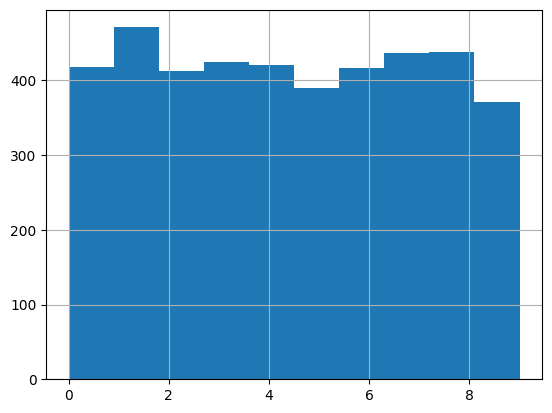

In [35]:
# create a histogram of the label distribution
df_train['label'].hist()


In [36]:
# Show the distribution of the labels in the test set
df_test['label'].value_counts()

1    478
7    465
3    446
2    420
0    414
4    404
6    404
8    393
5    388
9    386
Name: label, dtype: int64

<AxesSubplot: >

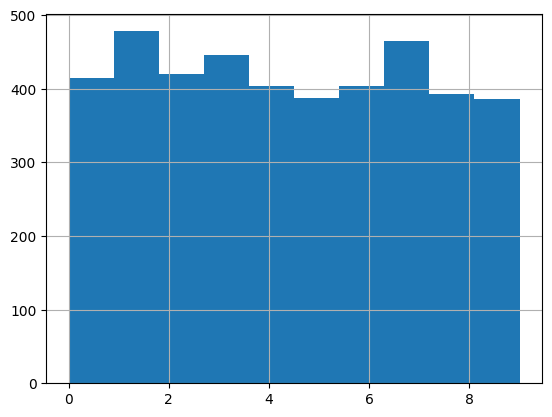

In [37]:
df_test['label'].hist()

We can see that the target numbers are distributed evenly, and there are 10 classes in total, from 0 to 9.

## 2. Creating decision tree models

### 2.1. Data preprocessing

In [38]:
# Create a decision tree classifier to identify the digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# separate the labels from the training and testing datasets, because the labels are not features. The training and testing datasets only contain the pixel values.
X_train = df_train.drop('label', axis=1) 
y_train = df_train['label']

X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

### 2.2 Create a basic decision tree model

In [39]:
# create a basic decision tree classifier
dtc1 = DecisionTreeClassifier()

# perform 5-fold cross-validation on the training data
scores = cross_val_score(dtc1, X_train, y_train, cv=5)

# train the model using the training data
dtc1.fit(X_train, y_train)

# predict the labels for the testing data
y_pred = dtc1.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# report the mean accuracy of the model based on 5-fold cross-validation
mean_accuracy = scores.mean()
print(f"5-fold CV accuracy: {mean_accuracy}")

Accuracy: 0.7782277274892806
5-fold CV accuracy: 0.7508360292865657


### 2.3 Tuning the parameters of the decision tree model

In [40]:
# add some parameters to the decision tree classifier
from sklearn.model_selection import GridSearchCV
dt_params = {'criterion': ['entropy', 'gini'], 'max_depth': [10, 20], 'min_samples_split': [4,10], 'min_samples_leaf': [1,5]}
# criterion: the function to measure the quality of a split
# max_depth: the maximum depth of the tree
# min_samples_split: the minimum number of samples required to split an internal node
# min_samples_leaf: the minimum number of samples required to be at a leaf node

dtc2 = GridSearchCV(dtc1, dt_params, cv=5) # GridSearchCV performs a grid search over the parameters

# train the model using the training data
dtc2.fit(X_train, y_train)

# predict the labels for the testing data
y_pred = dtc2.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# report the mean accuracy of the model based on 5-fold cross-validation
mean_accuracy = scores.mean()
print(f"5-fold CV accuracy: {mean_accuracy}")

Accuracy: 0.7686993806574559
5-fold CV accuracy: 0.7508360292865657


### 2.4 Print the best parameters

In [41]:
best_params = dtc2.best_params_ # get the best parameters
best_estimator = dtc2.best_estimator_ # get the best estimator
print(f"Best estimator: {best_estimator}")
print(f"Best parameters: {best_params}")

Best estimator: DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}


### 2.5 Predict the test data by the best model

In [42]:
# Predict the labels for the test data
y_pred = dtc2.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7686993806574559


## Section 3: Naive Bayes

### 3.1. Create Naive Bayes model and tune the hyperparameters

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# create a Naive Bayes classifier
nb_model = MultinomialNB()

# perform grid search to find the best smoothing parameter alpha
smooth_alphas = [0.01, 0.1, 1] # choose some values for alpha
best_alpha = None
best_score = -1

for alpha in smooth_alphas:
    nb_model.alpha = alpha
    scores = cross_val_score(nb_model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha
        
# train the model using the training data and the best smoothing parameter
nb_model.alpha = best_alpha
nb_model.fit(X_train, y_train)

# predict the labels for the testing data
y_pred = nb_model.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# report the mean accuracy of the model based on 5-fold cross-validation
nb_model.alpha = best_alpha
scores = cross_val_score(nb_model, X_train, y_train, cv=5)
mean_accuracy = scores.mean()
print(f"5-fold CV accuracy: {mean_accuracy}")

Accuracy: 0.8180085755121487
5-fold CV accuracy: 0.8308766104773255


### 3.2. Print the best parameters and model

In [44]:
# Print the best smoothing parameter
print(f"Best alpha: {best_alpha}")

Best alpha: 0.1


### 3.3. Predict the test data by the best model

In [45]:
# Predict the labels for the test data
y_pred = nb_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.8180085755121487


## Section 4: Model comparison

The accuracy of the decision tree model is 0.77, and the accuracy of the Naive Bayes model is 0.82. The Naive Bayes model has a higher accuracy than the decision tree model.

The Naive Bayes model runs faster than the decision tree model. The Naive Bayes model takes 0.8 seconds to run, and the decision tree model takes 32 seconds to run. 

The Naive Bayes model runs faster because it does not need to split the data into different branches. 